In [1]:
import re
import nltk
from nltk.corpus import stopwords
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy

C:\Users\dell\Anaconda3\envs\pytorch_p37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dell\Anaconda3\envs\pytorch_p37\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\dell\Anaconda3\envs\pytorch_p37\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data= pd.read_csv("airline_sentiment_analysis.csv")

In [3]:
def tweet_to_words(text):
    letters_only = re.sub("[^a-zA-Z]", " ",text) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [4]:
data['sentiment']=data['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [5]:
data.head()

,Unnamed: 0,airline_sentiment,text,sentiment
0,1,positive,@VirginAmerica plus you've added commercials t...,1
1,3,negative,@VirginAmerica it's really aggressive to blast...,0
2,4,negative,@VirginAmerica and it's a really big bad thing...,0
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [20]:
data['text']=data['text'].apply(lambda x: tweet_to_words(x))
train,test = train_test_split(data,test_size=0.2,random_state=42)
data.head()

,Unnamed: 0,airline_sentiment,text,sentiment
0,1,positive,virginamerica plus added commercials experienc...,1
1,3,negative,virginamerica really aggressive blast obnoxiou...,0
2,4,negative,virginamerica really big bad thing,0
3,5,negative,virginamerica seriously would pay flight seats...,0
4,6,positive,virginamerica yes nearly every time fly vx ear...,1


In [8]:
train_text=[]
for text in train['text']:
    train_text.append(text)
test_text=[]
for text in test['text']:
    test_text.append(text)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_text)
test_features=v.transform(test_text)
train_text[0]

'usairways another dead end handle aa l amp f gave failed already vm full lost'

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [17]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    GaussianNB()]

In [18]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    

Accuracy of LogisticRegressionis 0.8064097011693374
Accuracy of KNeighborsClassifieris 0.7267215244694673
Accuracy of SVCis 0.8072758770030316
Accuracy of GaussianNBis 0.6929406669553919


Text(0.5, 1.0, 'Accuracies of Models')

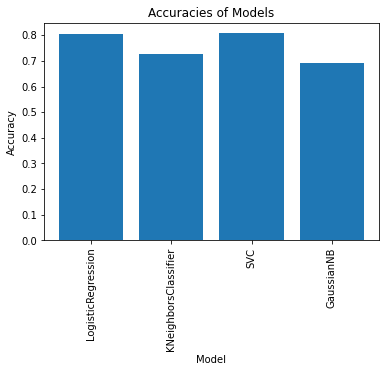

In [19]:
Index = [1,2,3,4]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')